In [12]:
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
from turtle import width

In [29]:
NTHREADS = "Number of Threads"
MAX_VALUE = "Max Value"
EXC_TIME = "Execution time"
SPEEDUP = "Speedup"

In [2]:

#Run script, save values to csv

return_values = pd.DataFrame(columns=[NTHREADS, MAX_VALUE, EXC_TIME])
for threads in [1,2,4,8]:
    for max_value in  [1000000, 2000000, 10000000, 40000000]:
        stdout = subprocess.run(["./sieve_of_eratosthenes_parallel", f"{max_value}", f"{threads}", "--time"], capture_output = True).stdout.decode()
        return_values = return_values.append({NTHREADS: threads, MAX_VALUE: max_value, EXC_TIME: stdout}, ignore_index=True)
    print(return_values)
return_values.to_csv("stdout.csv")


  Number of Threads Max Value Execution time
0                 1   1000000        1636699
1                 1   2000000        4403795
2                 1  10000000       42763342
3                 1  40000000      315262601
  Number of Threads Max Value Execution time
0                 1   1000000        1636699
1                 1   2000000        4403795
2                 1  10000000       42763342
3                 1  40000000      315262601
4                 2   1000000         857460
5                 2   2000000        2210973
6                 2  10000000       21805862
7                 2  40000000      157927405
   Number of Threads Max Value Execution time
0                  1   1000000        1636699
1                  1   2000000        4403795
2                  1  10000000       42763342
3                  1  40000000      315262601
4                  2   1000000         857460
5                  2   2000000        2210973
6                  2  10000000       21805862
7 

In [46]:
#Load csv, plot chart
stdout = pd.read_csv("stdout.csv", index_col=0)
stdout[EXC_TIME] = stdout[EXC_TIME] / 1000 # µs to ms

speedups = pd.DataFrame(columns=[NTHREADS, MAX_VALUE, SPEEDUP])

for max in [1000000, 2000000, 10000000, 40000000]:
    t1 = stdout[(stdout[MAX_VALUE] == max)&(stdout[NTHREADS] == 1)][EXC_TIME].iloc[0]
    for i, record in stdout[(stdout[MAX_VALUE] == max)].iterrows():
        speedups = speedups.append({NTHREADS: record[NTHREADS], MAX_VALUE: max, SPEEDUP: t1 / record[EXC_TIME]}, ignore_index=True)

data = speedups.pivot(NTHREADS, MAX_VALUE, SPEEDUP)
data

Max Value,1000000.0,2000000.0,10000000.0,40000000.0
Number of Threads,,,,
1.0,1.000000,1.000000,1.000000,1.000000
2.0,1.962679,1.978277,1.969874,1.981359
4.0,3.857185,3.905088,3.909989,3.941189
8.0,7.412357,7.561816,7.714275,7.830329
16.0,13.359858,13.888169,14.602987,14.939149


In [41]:
stdpivot = stdout.pivot(MAX_VALUE, NTHREADS, EXC_TIME)
stdpivot

Number of Threads,1,2,4,8,16
Max Value,,,,,
1000000,5224.800,2662.075,1354.563,704.877,391.082
2000000,13998.955,7076.337,3584.799,1851.269,1007.977
10000000,142640.854,72411.147,36481.140,18490.507,9767.923
40000000,1067057.407,538548.155,270745.028,136272.368,71426.919


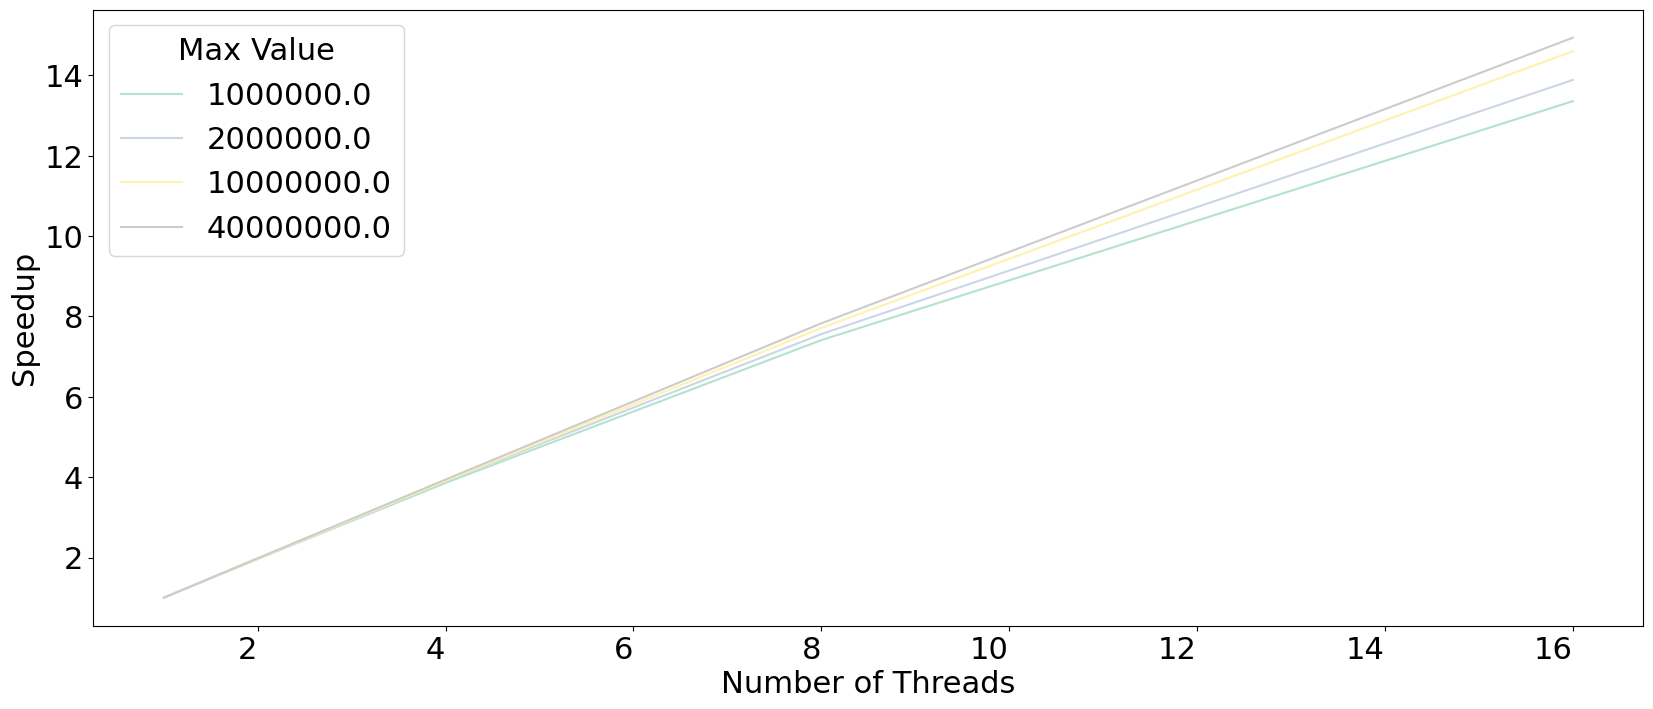

In [48]:
plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams.update({'font.size': 22})

ax = data.plot(kind='line', colormap="Pastel2")
ax.set_ylabel("Speedup")
plt.xticks(rotation=0, ha='right')
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig("performance_visualisation.png", bbox_inches='tight')